In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
confirm = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/data/covid19/confirmed.csv')
confirm

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,20200120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20200121,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20200122,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20200123,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20200124,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,20211116,133513,14875,17964,21654,5660,7920,5528,1409,119695,7696,8411,11655,5748,3889,10378,13905,3327
653,20211117,134948,14978,18020,21813,5694,7965,5542,1425,120658,7750,8439,11726,5798,3925,10404,13971,3350
654,20211118,136376,15068,18093,22008,5728,8001,5552,1435,121624,7812,8465,11808,5852,3965,10455,14069,3378
655,20211119,137777,15145,18140,22196,5752,8054,5556,1438,122473,7884,8485,11864,5876,4011,10504,14147,3409


In [ ]:
death = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/data/covid19/death.csv')
death

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,20200120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20200121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20200122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20200123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20200124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,20211116,890,172,290,120,29,56,57,2,1036,68,88,68,69,25,98,46,7
653,20211117,898,174,291,121,29,56,57,2,1043,68,88,68,70,25,98,46,8
654,20211118,912,175,293,123,29,56,57,2,1047,68,88,72,70,25,99,46,9
655,20211119,926,175,295,125,29,56,57,2,1054,68,88,73,70,25,100,47,9


In [ ]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
confirm_by_locate = confirm.drop( columns=['날짜'] ).loc[ confirm.index[-1] ]
confirm_by_locate

서울    139154
부산     15231
대구     18201
인천     22400
광주      5791
대전      8086
울산      5561
세종      1445
경기    123466
강원      7943
충북      8519
충남     11938
전북      5908
전남      4077
경북     10539
경남     14226
제주      3432
Name: 656, dtype: int64

In [ ]:
death_by_locate = death.drop( columns=['날짜'] ).loc[ death.index[-1] ]
death_by_locate

서울     941
부산     177
대구     296
인천     126
광주      29
대전      56
울산      57
세종       2
경기    1061
강원      69
충북      89
충남      74
전북      70
전남      25
경북     100
경남      47
제주       9
Name: 656, dtype: int64

In [ ]:
confirm_by_locate = confirm_by_locate.sort_values( ascending=False )
death_by_locate = death_by_locate.sort_values( ascending=False )

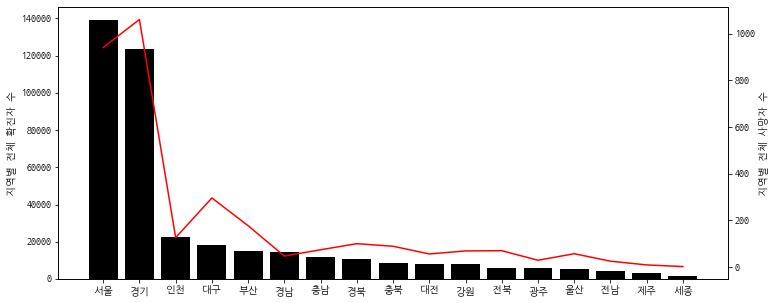

In [ ]:
# 확진자 수 표현
plt.figure( figsize = (12, 5) )
sns.barplot( x=confirm_by_locate.index, y=confirm_by_locate, color='black' )
plt.ylabel('지역별 전체 확진자 수')

# 사망자 수 표현
# 단위가 다른 경우에 한번에 그리는 방법
ax = plt.gca()
ax2 = ax.twinx()

death_by_locate = death_by_locate[ confirm_by_locate.index ]
sns.lineplot( x=death_by_locate.index, y=death_by_locate, ax=ax2, color='red' )
ax2.set_ylabel('지역별 전체 사망자 수')

plt.show()

날짜를 인덱스로 해서 서울 지역의 확진자수의 변화 그래프

In [ ]:
col = ['날짜', '서울']
confirm_seoul=confirm[ col ]
confirm_seoul

,날짜,서울
0,20200120,0
1,20200121,0
2,20200122,0
3,20200123,0
4,20200124,1
...,...,...
652,20211116,133513
653,20211117,134948
654,20211118,136376
655,20211119,137777


In [ ]:
confirm['날짜'] = pd.to_datetime( confirm['날짜'], format='%Y%m%d' )

In [ ]:
death['날짜'] = pd.to_datetime( death['날짜'], format='%Y%m%d' )

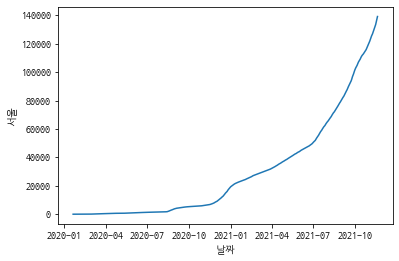

In [ ]:

sns.lineplot( data=confirm, x='날짜',y='서울' )

plt.show()

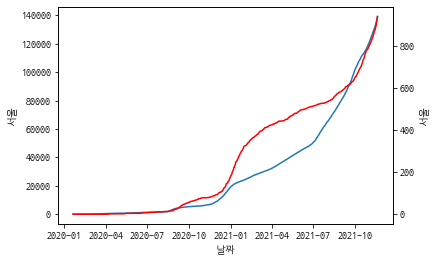

In [ ]:
sns.lineplot( data=confirm, x='날짜', y='서울')

ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=death, x='날짜', y='서울', ax=ax2, color='red')

일일 확진자 수

In [ ]:
col = ['날짜', '서울']
confirm['서울']=confirm['서울']
confirm_seoul=confirm[ col ]
confirm_seoul['서울']=confirm['서울'].diff().fillna(0)

confirm_seoul

,날짜,서울
0,2020-01-20,0.0
1,2020-01-21,0.0
2,2020-01-22,0.0
3,2020-01-23,0.0
4,2020-01-24,1.0
...,...,...
652,2021-11-16,845.0
653,2021-11-17,1435.0
654,2021-11-18,1428.0
655,2021-11-19,1401.0


In [ ]:
col = ['날짜', '서울']

death_seoul=death[ col ]
death_seoul['서울']=death['서울'].diff().fillna(0)

death_seoul

,날짜,서울
0,2020-01-20,0.0
1,2020-01-21,0.0
2,2020-01-22,0.0
3,2020-01-23,0.0
4,2020-01-24,0.0
...,...,...
652,2021-11-16,11.0
653,2021-11-17,8.0
654,2021-11-18,14.0
655,2021-11-19,14.0


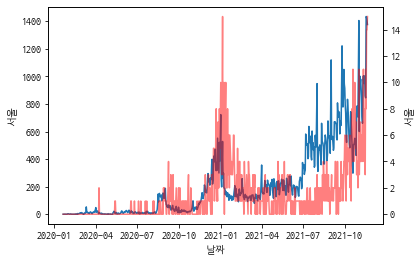

In [ ]:
sns.lineplot( data=confirm_seoul, x='날짜',y='서울' )
ax = plt.gca()
ax2 = ax.twinx() #y축 두개 설정
sns.lineplot( data=death_seoul, x='날짜',y='서울',ax=ax2, color='red' ,alpha=0.5)
plt.show()

In [ ]:
tmp = confirm.drop(columns='날짜').diff().fillna(0)
confirm_by_day = pd.concat( [confirm['날짜'], tmp], axis=1 )
confirm_by_day

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2020-01-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,2021-11-16,845.0,87.0,38.0,131.0,11.0,35.0,9.0,6.0,659.0,51.0,28.0,42.0,56.0,29.0,9.0,45.0,43.0
653,2021-11-17,1435.0,103.0,56.0,159.0,34.0,45.0,14.0,16.0,963.0,54.0,28.0,71.0,50.0,36.0,26.0,66.0,23.0
654,2021-11-18,1428.0,90.0,73.0,195.0,34.0,36.0,10.0,10.0,966.0,62.0,26.0,82.0,54.0,40.0,51.0,98.0,28.0
655,2021-11-19,1401.0,77.0,47.0,188.0,24.0,53.0,4.0,3.0,849.0,72.0,20.0,56.0,24.0,46.0,49.0,78.0,31.0


In [ ]:
import json

In [ ]:
geojson = json.load( open('/content/drive/MyDrive/멀티캠퍼스/data/population/sido.json') )

In [ ]:
confirm_by_locate=confirm_by_locate.rename( index={
    '서울':'서울특별시',
    '경기':'경기도',
    '인천':'인천광역시',
    '대구':'대구광역시',
    '부산':'부산광역시',
    '경남':'경상남도',
    '충남':'충청남도',
    '경북':'경상북도',
    '충북':'충청북도',
    '대전':'대전광역시',
    '전북':'전라북도',
    '전남':'전라남도',
    '광주':'광주광역시',
    '울산':'울산광역시',
    '제주':'제주특별자치도',
    '세종':'세종특별자치시',
    '강원':'강원도'

})

In [ ]:
confirm_by_locate

서울특별시      139154
경기도        123466
인천광역시       22400
대구광역시       18201
부산광역시       15231
경상남도        14226
충청남도        11938
경상북도        10539
충청북도         8519
대전광역시        8086
강원도          7943
전라북도         5908
광주광역시        5791
울산광역시        5561
전라남도         4077
제주특별자치도      3432
세종특별자치시      1445
Name: 656, dtype: int64

In [ ]:
import folium

In [ ]:
map = folium.Map( location = [37, 127], zoom_start=7, tiles="CartoDB dark_matter" )

folium.Choropleth(
  geo_data = geojson,
  data = confirm_by_locate,
 # columns = [confir.index, '전체 인구수'],
  fill_color='YlOrRd',
  # fill_opacity = 0.7,
  # line_opacity=0.5,
  key_on = 'properties.CTP_KOR_NM'
).add_to(map)

map

**plotly 사용**

In [ ]:
!pip install --upgrade plotly
import plotly.express as px

     |████████████████████████████████| 25.3 MB 289 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
fig = px.choropleth(
  confirm_by_locate,
  geojson = geojson, 
  locations=confirm_by_locate.index,
  color = confirm_by_locate.name,
  color_continuous_scale='Blues',
  featureidkey = 'properties.CTP_KOR_NM'
)

fig.update_geos(fitbounds='locations', visible=False)
fig.update_layout()